<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_python_labirintus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Labirintus

##Labirintus készítés
12 klasszikus algoritmus választható generálására „tökéletes” mazes. 



http://weblog.jamisbuck.org/2011/1/3/maze-generation-kruskal-s-algorithm
http://weblog.jamisbuck.org/2011/1/10/maze-generation-prim-s-algorithm
http://weblog.jamisbuck.org/2010/12/27/maze-generation-recursive-backtracking
http://weblog.jamisbuck.org/2011/1/17/maze-generation-aldous-broder-algorithm
http://weblog.jamisbuck.org/2011/1/27/maze-generation-growing-tree-algorithm
http://weblog.jamisbuck.org/2011/1/24/maze-generation-hunt-and-kill-algorithm
http://weblog.jamisbuck.org/2011/1/20/maze-generation-wilson-s-algorithm
http://weblog.jamisbuck.org/2010/12/29/maze-generation-eller-s-algorithm
https://en.wikipedia.org/wiki/Maze_generation_algorithm#Cellular_automaton_algorithms
http://weblog.jamisbuck.org/2011/1/12/maze-generation-recursive-division-algorithm
http://weblog.jamisbuck.org/2011/2/3/maze-generation-sidewinder-algorithm


A labirintus tökéletes, ha van megoldása, és csak egy megoldás létezik. 


Íme WEB-es algoritmus megvalósításra:

http://www.astrolog.org/labyrnth/algrithm.htm

Online python oktatás:
https://trinket.io/features/python3
https://repl.it/@prasanththangavel/Maze-Game
https://runestone.academy/runestone/books/published/pythonds/index.html

In [1]:
import random

# Ötlet                  
# https://scipython.com/blog/making-a-maze/                                     

class Cell:
    """A cell in the maze.

    A maze "Cell" is a point in the grid which may be surrounded by walls to
    the north, east, south or west.

    """

    # A wall separates a pair of cells in the N-S or W-E directions.
    wall_pairs = {'N': 'S', 'S': 'N', 'E': 'W', 'W': 'E'}

    def __init__(self, x, y):
        """Initialize the cell at (x,y). At first it is surrounded by walls."""

        self.x, self.y = x, y
        self.walls = {'N': True, 'S': True, 'E': True, 'W': True}

    def has_all_walls(self):
        """Does this cell still have all its walls?"""

        return all(self.walls.values())

    def knock_down_wall(self, other, wall):
        """Knock down the wall between cells self and other."""

        self.walls[wall] = False
        other.walls[Cell.wall_pairs[wall]] = False

class Maze:
    """A Maze, represented as a grid of cells."""

    def __init__(self, nx, ny, ix=0, iy=0):
        """Initialize the maze grid.
        The maze consists of nx x ny cells and will be constructed starting
        at the cell indexed at (ix, iy).

        """

        self.nx, self.ny = nx, ny
        self.ix, self.iy = ix, iy
        self.maze_map = [[Cell(x, y) for y in range(ny)] for x in range(nx)]

    def cell_at(self, x, y):
        """Return the Cell object at (x,y)."""

        return self.maze_map[x][y]

    def __str__(self):
        """Return a (crude) string representation of the maze."""

        maze_rows = ['-' * nx*2]
        for y in range(ny):
            maze_row = ['|']
            for x in range(nx):
                if self.maze_map[x][y].walls['E']:
                    maze_row.append(' |')
                else:
                    maze_row.append('  ')
            maze_rows.append(''.join(maze_row))
            maze_row = ['|']
            for x in range(nx):
                if self.maze_map[x][y].walls['S']:
                    maze_row.append('-+')
                else:
                    maze_row.append(' +')
            maze_rows.append(''.join(maze_row))
        return '\n'.join(maze_rows)

    def write_svg(self, filename):
        """Write an SVG image of the maze to filename."""

        aspect_ratio = self.nx / self.ny
        # Pad the maze all around by this amount.
        padding = 10
        # Height and width of the maze image (excluding padding), in pixels
        height = 500
        width = int(height * aspect_ratio)
        # Scaling factors mapping maze coordinates to image coordinates
        scy, scx = height / ny, width / nx

        def write_wall(f, x1, y1, x2, y2):
            """Write a single wall to the SVG image file handle f."""

            print('<line x1="{}" y1="{}" x2="{}" y2="{}"/>'
                                .format(x1, y1, x2, y2), file=f)

        # Write the SVG image file for maze
        with open(filename, 'w') as f:
            # SVG preamble and styles.
            print('<?xml version="1.0" encoding="utf-8"?>', file=f)
            print('<svg xmlns="http://www.w3.org/2000/svg"', file=f)
            print('    xmlns:xlink="http://www.w3.org/1999/xlink"', file=f)
            print('    width="{:d}" height="{:d}" viewBox="{} {} {} {}">'
                    .format(width+2*padding, height+2*padding,
                        -padding, -padding, width+2*padding, height+2*padding),
                  file=f)
            print('<defs>\n<style type="text/css"><![CDATA[', file=f)
            print('line {', file=f)
            print('    stroke: #000000;\n    stroke-linecap: square;', file=f)
            print('    stroke-width: 5;\n}', file=f)
            print(']]></style>\n</defs>', file=f)
            # Draw the "South" and "East" walls of each cell, if present (these
            # are the "North" and "West" walls of a neighbouring cell in
            # general, of course).
            for x in range(nx):
                for y in range(ny):
                    if maze.cell_at(x,y).walls['S']:
                        x1, y1, x2, y2 = x*scx, (y+1)*scy, (x+1)*scx, (y+1)*scy
                        write_wall(f, x1, y1, x2, y2)
                    if maze.cell_at(x,y).walls['E']:
                        x1, y1, x2, y2 = (x+1)*scx, y*scy, (x+1)*scx, (y+1)*scy
                        write_wall(f, x1, y1, x2, y2)
            # Draw the North and West maze border, which won't have been drawn
            # by the procedure above. 
            print('<line x1="0" y1="0" x2="{}" y2="0"/>'.format(width), file=f)
            print('<line x1="0" y1="0" x2="0" y2="{}"/>'.format(height),file=f)
            print('</svg>', file=f)

    def find_valid_neighbours(self, cell):
        """Return a list of unvisited neighbours to cell."""

        delta = [('W', (-1,0)),
                 ('E', (1,0)),
                 ('S', (0,1)),
                 ('N', (0,-1))]
        neighbours = []
        for direction, (dx,dy) in delta:
            x2, y2 = cell.x + dx, cell.y + dy
            if (0 <= x2 < nx) and (0 <= y2 < ny):
                neighbour = maze.cell_at(x2, y2)
                if neighbour.has_all_walls():
                    neighbours.append((direction, neighbour))
        return neighbours

    def make_maze(self):
        # Total number of cells.
        n = self.nx * self.ny
        cell_stack = []
        current_cell = self.cell_at(ix, iy)
        # Total number of visited cells during maze construction.
        nv = 1

        while nv < n:
            neighbours = self.find_valid_neighbours(current_cell)

            if not neighbours:
                # We've reached a dead end: backtrack.
                current_cell = cell_stack.pop()
                continue

            # Choose a random neighbouring cell and move to it.
            direction, next_cell = random.choice(neighbours)
            current_cell.knock_down_wall(next_cell, direction)
            cell_stack.append(current_cell)
            current_cell = next_cell
            nv += 1

# Maze dimensions (ncols, nrows)
nx, ny = 40, 40
# Maze entry position
ix, iy = 0, 0

maze = Maze(nx, ny, ix, iy)
maze.make_maze()

print(maze)
maze.write_svg('maze.svg')

--------------------------------------------------------------------------------
|   |       |                   |               |           |   |             | |
|-+ + +-+ + +-+ +-+-+-+-+ +-+-+ + +-+-+ +-+-+ + +-+-+-+ +-+-+ + + +-+-+-+ +-+ + +
|   | |   |   |   | |   | |     | |   |   |   | |       |     | | |     |   |   |
| +-+-+ +-+-+ +-+ + + + + +-+-+ +-+ + +-+-+ +-+ + +-+-+ + +-+-+ + + +-+-+-+ +-+ +
|       |     |   |   | |     | |   | |     |     |     |     | | | |       |   |
|-+-+-+-+ +-+-+ +-+-+-+ +-+-+ + + +-+ + +-+-+ +-+-+ +-+-+ +-+-+ + + + +-+-+-+ +-+
|       |     |   |   |     | |   |     |     |   | |   | |     | | |     |     |
|-+-+ +-+-+-+ +-+ + + +-+-+ + +-+ +-+-+-+-+ +-+ + +-+ + + + +-+ + + +-+-+ +-+-+ +
|     |       |     |     | | |   |       | |   |     |   | |   |     | |   |   |
| +-+ + +-+-+-+ +-+-+-+-+ + + +-+-+ +-+-+ +-+ +-+-+-+-+-+-+ + +-+-+-+ + +-+ + +-+
| |   |       |   |     |   | |     |     |   |     | |     | |   |   |   | |   |
| +-+-+-+-+-+ +-+

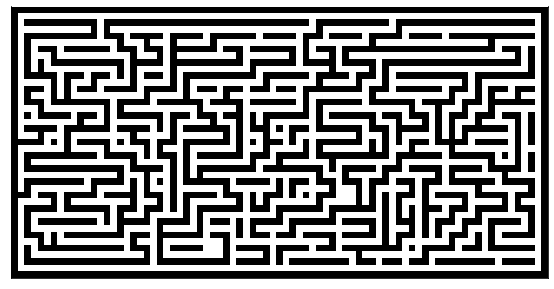

In [2]:
import numpy
from numpy.random import randint as rand
import matplotlib.pyplot as pyplot

def generate_maze(width=81, height=51, complexity=.75, density=.75):
    """Generate a maze using a maze generation algorithm."""
    # Only odd shapes
    shape = ((height // 2) * 2 + 1, (width // 2) * 2 + 1)
    # Adjust complexity and density relative to maze size
    complexity = int(complexity * (5 * (shape[0] + shape[1])))  # Number of components
    density    = int(density * ((shape[0] // 2) * (shape[1] // 2)))  # Size of components
    # Build actual maze
    Z = numpy.zeros(shape, dtype=bool)
    # Fill borders
    Z[0, :] = Z[-1, :] = 1
    Z[:, 0] = Z[:, -1] = 1
    # Make aisles
    for i in range(density):
        x, y = rand(0, shape[1] // 2) * 2, rand(0, shape[0] // 2) * 2  # Pick a random position
        Z[y, x] = 1
        for j in range(complexity):
            neighbours = []
            if x > 1:             neighbours.append((y, x - 2))
            if x < shape[1] - 2:  neighbours.append((y, x + 2))
            if y > 1:             neighbours.append((y - 2, x))
            if y < shape[0] - 2:  neighbours.append((y + 2, x))
            if len(neighbours):
                y_, x_ = neighbours[rand(0, len(neighbours) - 1)]
                if Z[y_, x_] == 0:
                    Z[y_, x_] = 1
                    Z[y_ + (y - y_) // 2, x_ + (x - x_) // 2] = 1
                    x, y = x_, y_
    return Z

pyplot.figure(figsize=(10, 5))
pyplot.imshow(generate_maze(80, 40), cmap=pyplot.cm.binary, interpolation='nearest')
pyplot.xticks([]), pyplot.yticks([])
pyplot.show()

In [3]:
def Dijkstra(Graph, source):
    '''
        +   +---+---+
        | 0   1   2 |
        +---+   +   +
        | 3   4 | 5  
        +---+---+---+
 
        >>> graph = (        # or ones on the diagonal
        ...     (0,1,0,0,0,0,),
        ...     (1,0,1,0,1,0,),
        ...     (0,1,0,0,0,1,),
        ...     (0,0,0,0,1,0,),
        ...     (0,1,0,1,0,0,),
        ...     (0,0,1,0,0,0,),
        ... )
        ...
        >>> Dijkstra(graph, 0)
        ([0, 1, 2, 3, 2, 3], [1e+140, 0, 1, 4, 1, 2])
        >>> display_solution([1e+140, 0, 1, 4, 1, 2])
        5<2<1<0
    '''
    # Graph[u][v] is the weight from u to v (however 0 means infinity)
    infinity = float('infinity')
    n = len(graph)
    dist = [infinity]*n   # Unknown distance function from source to v
    previous = [infinity]*n # Previous node in optimal path from source
    dist[source] = 0        # Distance from source to source
    Q = list(range(n)) # All nodes in the graph are unoptimized - thus are in Q
    while Q:           # The main loop
        u = min(Q, key=lambda n:dist[n])                 # vertex in Q with smallest dist[]
        Q.remove(u)
        if dist[u] == infinity:
            break # all remaining vertices are inaccessible from source
        for v in range(n):               # each neighbor v of u
            if Graph[u][v] and (v in Q): # where v has not yet been visited
                alt = dist[u] + Graph[u][v]
                if alt < dist[v]:       # Relax (u,v,a)
                    dist[v] = alt
                    previous[v] = u
    return dist,previous
 
def display_solution(predecessor):
    cell = len(predecessor)-1
    while cell:
        print(cell,end='<')
        cell = predecessor[cell]
    print(0)
    
graph = (        # or ones on the diagonal
             (0,1,0,0,0,0,),
             (1,0,1,0,1,0,),
             (0,1,0,0,0,1,),
             (0,0,0,0,1,0,),
             (0,1,0,1,0,0,),
             (0,0,1,0,0,0,),
         )
        
Dijkstra(graph, 0)


([0, 1, 2, 3, 2, 3], [inf, 0, 1, 4, 1, 2])

In [9]:
#!/usr/bin/env python3
import os
import cv2
import glob
import shutil
import random
import imageio
from PIL import Image
from queue import Queue
from time import perf_counter


class MazeSolver:
    """
    Solve a 2-color(wall color and path color) maze using several algorithm choices:
    - Breadth-First Search Algorithm(BFS).
    """

    def __init__(
        self,
        maze_path,
        marking_color,
        start_end=None,
        solution_size=(500, 500),
        downsize=(150, 150),
    ):
        """
        Initialize maze image, mark start and end points.
        maze_path: a string (path to maze image).
        marking_color: RGB tuple of color to use for drawing the solution path.
        solution_size: a tuple (height, width) of the solved version size.
        start_end: a tuple of x, y coordinates of maze start and x, y coordinates of maze end or
        'a' for automatic mode.
        """
        self.path = input(
            "Enter folder path to save images and GIF frames: "
        ).rstrip()
        while not os.path.exists(self.path):
            print(f"Invalid folder path {self.path}")
            self.path = input(
                "Enter folder path to save images and gifs: "
            ).rstrip()
        self.maze = Image.open(maze_path).resize(downsize)
        self.downsize = downsize
        self.height, self.width = self.maze.size
        self.maze_path = maze_path
        self.marking_color = marking_color
        if start_end == "a":
            self.initial_coordinates = []
            self._automatic_start_end()
            self.start, self.end = self.initial_coordinates
        if start_end and start_end != "a":
            self.start, self.end = start_end
        if not start_end:
            self.initial_coordinates = []
            self.titles = ["(End)", "(Start)"]
            self._set_start_end()
            self.start, self.end = self.initial_coordinates
        self.path_color = self.maze.getpixel(
            (self.start[0], self.start[1])
        )
        self.wall_color = self.maze.getpixel((0, 0))
        self.solution_name = (
            str(random.randint(10 ** 6, 10 ** 8))
            + " Maze solution"
        )
        self.output_image_size = solution_size
        self.configurations = {
            "bfs": self._breadth_first_search()
        }
        self.algorithm_names = {
            "bfs": "BREADTH-FIRST SEARCH "
        }

    def _automatic_start_end(self):
        """Determine start and end automatically"""
        start = 0
        end_rows, end_columns = (
            self.height - 1,
            self.width - 1,
        )
        border_color = self.maze.getpixel((0, 0))
        while (
            self.maze.getpixel((start, start))
            == border_color
        ):
            start += 1
        while (
            self.maze.getpixel((end_rows, end_columns))
            == border_color
        ):
            end_rows -= 1
            end_columns -= 1
        self.initial_coordinates.append((start, start))
        self.initial_coordinates.append(
            (end_rows, end_columns)
        )

    def _set_start_end(self):
        """
        Show maze image to determine coordinates.
        You will be shown the maze, click twice, first to indicate the starting point
        and second to indicate ending point and then press any key to proceed.
        """
        maze_image = cv2.imread(self.maze_path)
        resized_image = cv2.resize(
            maze_image, self.downsize
        )
        cv2.namedWindow("Maze to solve")
        cv2.setMouseCallback(
            "Maze to solve", self._get_mouse_click
        )
        cv2.imshow("Maze to solve", resized_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        if len(self.initial_coordinates) != 2:
            raise ValueError(
                f"Expected 2 clicks for start and end "
                f"respectively, got {len(self.initial_coordinates)}"
            )

    def _get_mouse_click(self, event, x, y, flags, param):
        """Get x, y coordinates for mouse clicks on maze image."""
        if event == cv2.EVENT_LBUTTONDOWN:
            self.initial_coordinates.append((x, y))
            print(
                f"Clicked on coordinates {x, y} {self.titles.pop()} color: {self.maze.getpixel((x, y))}"
            )

    def _get_neighbor_coordinates(self, coordinates):
        """
        Return a list of adjacent pixel coordinates that represent a path."""
        x, y = coordinates
        north = (x - 1, y)
        if north[0] < 0:
            north = None
        if (
            north
            and self.maze.getpixel(north) == self.wall_color
        ):
            north = None
        south = (x + 1, y)
        if south[0] > self.height:
            south = None
        if (
            south
            and self.maze.getpixel(south) == self.wall_color
        ):
            south = None
        east = (x, y + 1)
        if east[1] > self.width:
            east = None
        if (
            east
            and self.maze.getpixel(east) == self.wall_color
        ):
            east = None
        west = (x, y - 1)
        if west[1] < 0:
            west = None
        if (
            west
            and self.maze.getpixel(west) == self.wall_color
        ):
            west = None
        return [
            neighbor
            for neighbor in (north, south, east, west)
            if neighbor
        ]

    def _breadth_first_search(self):
        """Return path and visited pixels solved by a breadth-first search algorithm."""
        check = Queue()
        check.put([self.start])
        visited = []
        while not check.empty():
            path = check.get()
            last = path[-1]
            if last == self.end:
                return path, visited
            if last not in visited:
                neighbor_coordinates = self._get_neighbor_coordinates(
                    last
                )
                valid_coordinates = [
                    neighbor
                    for neighbor in neighbor_coordinates
                    if neighbor not in visited
                ]
                for valid_coordinate in valid_coordinates:
                    new_path = list(path)
                    new_path.append(valid_coordinate)
                    check.put(new_path)
                visited.append(last)
        raise ValueError(
            f"Too low downsize rate {self.downsize}"
        )

    def produce_path_image(self, configuration):
        """
        Draw path in maze and return solved maze picture.
        configuration: a string representing the algorithm:
        - 'bfs': solve using breadth-first search algorithm.
        """
        start_time = perf_counter()
        os.chdir(self.path)
        if configuration not in self.configurations:
            raise ValueError(
                f"Invalid configuration {configuration}"
            )
        path, visited = self.configurations[configuration]
        for coordinate in path:
            self.maze.putpixel(
                coordinate, self.marking_color
            )
        if "Solutions" not in os.listdir(self.path):
            os.mkdir("Solutions")
        os.chdir("Solutions")
        maze_name = "".join(
            [
                self.algorithm_names[configuration],
                self.solution_name,
                ".png",
            ]
        )
        resized_maze = self.maze.resize(
            self.output_image_size
        )
        resized_maze.save(maze_name)
        end_time = perf_counter()
        print(f"Time: {end_time - start_time} seconds.")
        return resized_maze

    def produce_maze_solving_visualization(
        self, configuration, frame_speed, new_size=None
    ):
        """
        Generate GIF for the solution of the maze by the selected algorithm:
        configuration: a string:
        - 'bfs': Breadth-first search algorithm.
        frame_speed: frame speed in ms
        new_size: a tuple containing new (height, width)
        """
        start_time = perf_counter()
        initial_image = Image.open(self.maze_path).resize(
            self.downsize
        )
        os.chdir(self.path)
        if configuration not in self.configurations:
            raise ValueError(
                f"Invalid configuration {configuration}"
            )
        path, visited = self.configurations[configuration]
        count = 1
        for coordinate in visited:
            self.maze.putpixel(
                coordinate, self.marking_color
            )
            if new_size:
                resized = self.maze.resize(new_size)
                resized.save(str(count) + ".png")
            else:
                self.maze.save(str(count) + ".png")
            count += 1
        if new_size:
            resized = initial_image.resize(new_size)
            resized.save(str(count) + ".png")
        else:
            initial_image.save(str(count) + ".png")
        count += 1
        for coordinate in path[::-1]:
            initial_image.putpixel(
                coordinate, self.marking_color
            )
            if new_size:
                resized = initial_image.resize(new_size)
                resized.save(str(count) + ".png")
            else:
                initial_image.save(str(count) + ".png")
            count += 1
        os.mkdir(self.solution_name)
        for file in os.listdir(self.path):
            if file.endswith(".png"):
                shutil.move(file, self.solution_name)
        os.chdir(self.solution_name)
        frames = glob.glob("*.png")
        frames.sort(key=lambda x: int(x.split(".")[0]))
        frames = [imageio.imread(frame) for frame in frames]
        imageio.mimsave(
            self.path + str(self.solution_name) + ".gif",
            frames,
            "GIF",
            duration=frame_speed,
        )
        end_time = perf_counter()
        print(f"Time: {end_time - start_time} seconds.")


#if __name__ == "__main__":
test = MazeSolver("/content/sample_data/test.png", (255, 0, 0), "a")
test.produce_path_image("bfs").show()

KeyboardInterrupt: ignored

In [10]:
"""
Sample Python/Pygame Programs
Simpson College Computer Science
http://programarcadegames.com/
http://simpson.edu/computer-science/
 
From:
http://programarcadegames.com/python_examples/f.php?file=maze_runner.py
 
Explanation video: http://youtu.be/5-SbFanyUkQ
 
Part of a series:
http://programarcadegames.com/python_examples/f.php?file=move_with_walls_example.py
http://programarcadegames.com/python_examples/f.php?file=maze_runner.py
http://programarcadegames.com/python_examples/f.php?file=platform_jumper.py
http://programarcadegames.com/python_examples/f.php?file=platform_scroller.py
http://programarcadegames.com/python_examples/f.php?file=platform_moving.py
http://programarcadegames.com/python_examples/sprite_sheets/
"""
import pygame
 
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
BLUE = (0, 0, 255)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
PURPLE = (255, 0, 255)
 
 
class Wall(pygame.sprite.Sprite):
    """This class represents the bar at the bottom that the player controls """
 
    def __init__(self, x, y, width, height, color):
        """ Constructor function """
 
        # Call the parent's constructor
        super().__init__()
 
        # Make a BLUE wall, of the size specified in the parameters
        self.image = pygame.Surface([width, height])
        self.image.fill(color)
 
        # Make our top-left corner the passed-in location.
        self.rect = self.image.get_rect()
        self.rect.y = y
        self.rect.x = x
 
 
class Player(pygame.sprite.Sprite):
    """ This class represents the bar at the bottom that the
    player controls """
 
    # Set speed vector
    change_x = 0
    change_y = 0
 
    def __init__(self, x, y):
        """ Constructor function """
 
        # Call the parent's constructor
        super().__init__()
 
        # Set height, width
        self.image = pygame.Surface([15, 15])
        self.image.fill(WHITE)
 
        # Make our top-left corner the passed-in location.
        self.rect = self.image.get_rect()
        self.rect.y = y
        self.rect.x = x
 
    def changespeed(self, x, y):
        """ Change the speed of the player. Called with a keypress. """
        self.change_x += x
        self.change_y += y
 
    def move(self, walls):
        """ Find a new position for the player """
 
        # Move left/right
        self.rect.x += self.change_x
 
        # Did this update cause us to hit a wall?
        block_hit_list = pygame.sprite.spritecollide(self, walls, False)
        for block in block_hit_list:
            # If we are moving right, set our right side to the left side of
            # the item we hit
            if self.change_x > 0:
                self.rect.right = block.rect.left
            else:
                # Otherwise if we are moving left, do the opposite.
                self.rect.left = block.rect.right
 
        # Move up/down
        self.rect.y += self.change_y
 
        # Check and see if we hit anything
        block_hit_list = pygame.sprite.spritecollide(self, walls, False)
        for block in block_hit_list:
 
            # Reset our position based on the top/bottom of the object.
            if self.change_y > 0:
                self.rect.bottom = block.rect.top
            else:
                self.rect.top = block.rect.bottom
 
 
class Room(object):
    """ Base class for all rooms. """
 
    # Each room has a list of walls, and of enemy sprites.
    wall_list = None
    enemy_sprites = None
 
    def __init__(self):
        """ Constructor, create our lists. """
        self.wall_list = pygame.sprite.Group()
        self.enemy_sprites = pygame.sprite.Group()
 
 
class Room1(Room):
    """This creates all the walls in room 1"""
    def __init__(self):
        super().__init__()
        # Make the walls. (x_pos, y_pos, width, height)
 
        # This is a list of walls. Each is in the form [x, y, width, height]
        walls = [[0, 0, 20, 250, WHITE],
                 [0, 350, 20, 250, WHITE],
                 [780, 0, 20, 250, WHITE],
                 [780, 350, 20, 250, WHITE],
                 [20, 0, 760, 20, WHITE],
                 [20, 580, 760, 20, WHITE],
                 [390, 50, 20, 500, BLUE]
                ]
 
        # Loop through the list. Create the wall, add it to the list
        for item in walls:
            wall = Wall(item[0], item[1], item[2], item[3], item[4])
            self.wall_list.add(wall)
 
 
class Room2(Room):
    """This creates all the walls in room 2"""
    def __init__(self):
        super().__init__()
 
        walls = [[0, 0, 20, 250, RED],
                 [0, 350, 20, 250, RED],
                 [780, 0, 20, 250, RED],
                 [780, 350, 20, 250, RED],
                 [20, 0, 760, 20, RED],
                 [20, 580, 760, 20, RED],
                 [190, 50, 20, 500, GREEN],
                 [590, 50, 20, 500, GREEN]
                ]
 
        for item in walls:
            wall = Wall(item[0], item[1], item[2], item[3], item[4])
            self.wall_list.add(wall)
 
 
class Room3(Room):
    """This creates all the walls in room 3"""
    def __init__(self):
        super().__init__()
 
        walls = [[0, 0, 20, 250, PURPLE],
                 [0, 350, 20, 250, PURPLE],
                 [780, 0, 20, 250, PURPLE],
                 [780, 350, 20, 250, PURPLE],
                 [20, 0, 760, 20, PURPLE],
                 [20, 580, 760, 20, PURPLE]
                ]
 
        for item in walls:
            wall = Wall(item[0], item[1], item[2], item[3], item[4])
            self.wall_list.add(wall)
 
        for x in range(100, 800, 100):
            for y in range(50, 451, 300):
                wall = Wall(x, y, 20, 200, RED)
                self.wall_list.add(wall)
 
        for x in range(150, 700, 100):
            wall = Wall(x, 200, 20, 200, WHITE)
            self.wall_list.add(wall)
 
 
def main():
    """ Main Program """
 
    # Call this function so the Pygame library can initialize itself
    pygame.init()
 
    # Create an 800x600 sized screen
    screen = pygame.display.set_mode([800, 600])
 
    # Set the title of the window
    pygame.display.set_caption('Maze Runner')
 
    # Create the player paddle object
    player = Player(50, 50)
    movingsprites = pygame.sprite.Group()
    movingsprites.add(player)
 
    rooms = []
 
    room = Room1()
    rooms.append(room)
 
    room = Room2()
    rooms.append(room)
 
    room = Room3()
    rooms.append(room)
 
    current_room_no = 0
    current_room = rooms[current_room_no]
 
    clock = pygame.time.Clock()
 
    done = False
 
    while not done:
 
        # --- Event Processing ---
 
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                done = True
 
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_LEFT:
                    player.changespeed(-5, 0)
                if event.key == pygame.K_RIGHT:
                    player.changespeed(5, 0)
                if event.key == pygame.K_UP:
                    player.changespeed(0, -5)
                if event.key == pygame.K_DOWN:
                    player.changespeed(0, 5)
 
            if event.type == pygame.KEYUP:
                if event.key == pygame.K_LEFT:
                    player.changespeed(5, 0)
                if event.key == pygame.K_RIGHT:
                    player.changespeed(-5, 0)
                if event.key == pygame.K_UP:
                    player.changespeed(0, 5)
                if event.key == pygame.K_DOWN:
                    player.changespeed(0, -5)
 
        # --- Game Logic ---
 
        player.move(current_room.wall_list)
 
        if player.rect.x < -15:
            if current_room_no == 0:
                current_room_no = 2
                current_room = rooms[current_room_no]
                player.rect.x = 790
            elif current_room_no == 2:
                current_room_no = 1
                current_room = rooms[current_room_no]
                player.rect.x = 790
            else:
                current_room_no = 0
                current_room = rooms[current_room_no]
                player.rect.x = 790
 
        if player.rect.x > 801:
            if current_room_no == 0:
                current_room_no = 1
                current_room = rooms[current_room_no]
                player.rect.x = 0
            elif current_room_no == 1:
                current_room_no = 2
                current_room = rooms[current_room_no]
                player.rect.x = 0
            else:
                current_room_no = 0
                current_room = rooms[current_room_no]
                player.rect.x = 0
 
        # --- Drawing ---
        screen.fill(BLACK)
 
        movingsprites.draw(screen)
        current_room.wall_list.draw(screen)
 
        pygame.display.flip()
 
        clock.tick(60)
 
    pygame.quit()
 
if __name__ == "__main__":
    main()

ModuleNotFoundError: ignored

In [11]:
# Author: William
# Description: This is a maze solving algorithm. This is an implementation of the Wall Follower Algorithm. 
# It uses the "left hand" of the robot as a means to solve the maze.
# Date: April 23, 2018

import sys, pygame
from pygame.locals import *

size_x = 32
size_y = 32 

change_x = 32
change_y = 32

Size = 32

SPEED = 32
timer = 375

DAY9YELLOW = (255, 167, 26)
GOAL = (245, 163, 183)
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
GREY = (200, 200, 200)
BLUE = (50, 50, 255)

m = 21
n = 21

goal_x = 640
goal_y = 576

# List to hold all the sprites
all_sprite_list = pygame.sprite.Group()
clock = pygame.time.Clock()

            # x--->
           # 0 ------------------>                      21
maze = [    [1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],  # 0      y
            [1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1],  # 1      |
            [1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1],  # 2    \ | /  
            [1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1],  # 3     \ /
            [1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1],  # 4      `
            [1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1],  # 5
            [1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1],  # 6
            [1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1],  # 7
            [1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1],  # 8
            [1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1],  # 9
            [1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1],  # 10
            [1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1],  # 11
            [1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1],  # 12
            [1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1],  # 13
            [1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1],  # 14
            [1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1],  # 15
            [1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1],  # 16
            [1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1],  # 17
            [1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1],  # 18
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1],  # 19
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1],  # 20
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1]  ]  # 21

class Robot(pygame.sprite.Sprite):

    def __init__(self, x, y): 
        # Call the parent's constructor
        super().__init__()

        # Set height, width
        self.image = pygame.Surface([Size, Size])
        self.image.fill(DAY9YELLOW)
 
        # Make our top-left corner the passed-in location.
        self.rect = self.image.get_rect()
        self.rect.y = y
        self.rect.x = x
        
        self.face = 5
        self.lhs = 4
 
        # Set speed vector
        self.change_x = 0
        self.change_y = 0

        self.walls = None
        self.goals = None
        self.space = None
  
    def update(self):
        """ Update the robot position. """
        # Move left/right=====
        self.rect.x += self.change_x

        if((self.change_x<0) & (maze[int(self.rect.x/32)][int(self.rect.y/32)+1] != 1)):
            print ("Going West, Turning Left")
            self.face = (self.face - 1) % 4
            self.lhs = (self.lhs - 1) % 4
            

        if((self.change_x>0) & (maze[int(self.rect.x/32)][int(self.rect.y/32)-1] != 1)):
            print ("Going East, Turning Left")
            self.face = (self.face - 1) % 4
            self.lhs = (self.lhs - 1) % 4
            

        block_hit_list = pygame.sprite.spritecollide(self, self.walls, False)
        for block in block_hit_list:
            
            # Wall to the east
            if ((self.change_x > 0) & (self.face %4 == 1)): 
                if((maze[int(self.rect.x/32)][int(self.rect.y/32)] == 0)):
                    print("what")
                self.rect.x -= self.change_x
                print ("You've hit a wall at the East")
                self.rect.right = block.rect.left
                print ("Turning Right")
                self.face = (1 + self.face ) % 4
                self.lhs = (1 + self.lhs) % 4

            # Wall to the west
            elif ((self.change_x < 0) & (self.face %4 ==3)): 
                self.rect.x -= self.change_x
                print ("You've hit a wall at the West!")
                self.rect.left = block.rect.right
                print ("Turning Right")
                self.face = (self.face + 1) % 4
                self.lhs = (1 + self.lhs) % 4


        self.rect.y += self.change_y

        if((self.change_y>0) & (maze[int(self.rect.x/32)+1][int(self.rect.y/32)] != 1)):
            print ("Going South, Turning Left")
            self.face = (self.face - 1) % 4
            self.lhs = (self.lhs - 1) % 4
            

        if((self.change_y<0) & (maze[int(self.rect.x/32)-1][int(self.rect.y/32)] != 1)):
            print ("Going North, Turning Left")
            self.face = (self.face - 1) % 4
            self.lhs = (self.lhs - 1) % 4
            
             
 
        block_hit_list = pygame.sprite.spritecollide(self, self.walls, False)
        for block in block_hit_list:
    
            # Wall to the South
            if ((self.change_y > 0) & (self.face %4 == 2)): 
                self.rect.y -= self.change_y
                print ("You've hit a wall at the South!")
                self.rect.bottom = block.rect.top
                print ("Turning Right")
                self.face = (1 + self.face ) % 4
                self.lhs = (1 + self.lhs) % 4

            # Wall to the North
            elif ((self.change_y < 0) & (self.face %4 == 0)):
                self.rect.y -= self.change_y
                print ("You've hit a wall at the North!")
                self.rect.top = block.rect.bottom
                print ("Turning Right")
                self.face = (self.face + 1) % 4
                self.lhs = (1 + self.lhs) % 4

        if(self.rect.x == goal_x) & (self.rect.y == goal_y):
            print("You've solved the maze! Hooray!!!")
            pygame.quit()
            sys.exit(0)
        
        self.change_x = 0
        self.change_y = 0
        
        
class Wall(pygame.sprite.Sprite):
    """ Wall the robot can run into. """
    def __init__(self, x, y, width, height):
        """ Constructor for the wall that the robot can run into. """
        super().__init__()
 
        # Make a black wall, of the size specified in the parameters
        self.image = pygame.Surface([width, height])
        self.image.fill(BLACK)
 
        # Make our top-left corner the passed-in location.
        self.rect = self.image.get_rect()
        self.rect.y = y
        self.rect.x = x

class Space(pygame.sprite.Sprite):
    """ Wall the robot can run into. """
    def __init__(self, x, y, width, height):
        """ Constructor for the wall that the robot can run into. """
        super().__init__()
  
        # Make a transparent wall, of the size specified in the parameters
        self.image = pygame.Surface([width, height], pygame.SRCALPHA, 32)
        self.image = self.image.convert_alpha()
        
        # Make our top-left corner the passed-in location.
        self.rect = self.image.get_rect()
        self.rect.y = y
        self.rect.x = x
        
class Goal(pygame.sprite.Sprite):
    """ Wall the robot can run into. """
    def __init__(self, x, y, width, height):
        """ Constructor for the wall that the robot can run into. """
        # Call the parent's constructor
        super().__init__()
 
        # Make the goal, of the size specified in the parameters
        self.image = pygame.Surface([width, height])
        self.image.fill(GOAL)
 
        # Make our top-left corner the passed-in location.
        self.rect = self.image.get_rect()
        self.rect.y = y
        self.rect.x = x
		 
        
# Left-Hand Rule wall following algorithm
def LHRwallFollowing(robot, screen):
    face = robot.face # 0 is north, 1 is east, 2 is south, 3 is west
    LHS = robot.lhs
    position = robot
    
    #lhs is north
    if(LHS%4 == 0):
        print("Current Position: (", int((robot.rect.x/32)+2),", ", int((robot.rect.y/32)-1), ") --Going East")
        robot.change_x += SPEED
                        
    #lhs is east
    if(LHS%4 == 1):
        print("Current Position: (", int((robot.rect.x/32)+2),", ", int((robot.rect.y/32)-1), ") --Going South")
        robot.change_y += SPEED

    #lhs is south
    if(LHS%4 == 2):
        print("Current Position: (",  int((robot.rect.x/32)+2),", ", int((robot.rect.y/32)-1), ") --Going West")
        robot.change_x += -SPEED

    #lhs is west
    if(LHS%4 == 3):
        print("Current Position: (",  int((robot.rect.x/32)+2), ", ", int((robot.rect.y/32)-1), ") --Going North")
        robot.change_y += -SPEED


def main():
    pygame.init()
    size = width, height = 640, 640
    screen = pygame.display.set_mode(size)
    pygame.display.set_caption('Maze Solving Project by William Z.')

    background = pygame.Surface(screen.get_size())
    background = background.convert()
    background.fill(WHITE)
    
    # Make the walls. (x_pos, y_pos, width, height)
    wall_list = pygame.sprite.Group()
    
    # Make the goal. (x_pos, y_pos, width, height)
    goal_list = pygame.sprite.Group()
    
    # Make the space. (x_pos, y_pos, width, height)
    space_list = pygame.sprite.Group()
    
    for j in range(0, n):
        for i in range(0, m):
            if(maze[i][j] == 1):
                wall = Wall(i*32, j*32, Size, Size)
                wall_list.add(wall)
                all_sprite_list.add(wall)
            if(maze[i][j] == 2):
                goal = Goal(i*32, j*32, Size, Size)
                goal_list.add(wall)
                all_sprite_list.add(goal)
            if(maze[i][j] == 0):
                space = Space(i*32, j*32, Size, Size)
                space_list.add(space)
                all_sprite_list.add(space)

    robot = Robot(-64, 32)
    robot.face = 1
    robot.lhs = 0
    robot.walls = wall_list
    robot.goals = goal_list
    robot.space = space_list

    all_sprite_list.add(robot)

    clock = pygame.time.Clock()

    done = False
    
    while not done:
    
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                done = True

        LHRwallFollowing(robot, screen)
    
        all_sprite_list.update()
 
        screen.fill(GREY)
    
        all_sprite_list.draw(screen)
    
        pygame.display.flip()
    
        clock.tick(60)
        pygame.time.wait(timer)
        
    pygame.quit()
    
if __name__ == '__main__': 
    main()

ModuleNotFoundError: ignored

In [12]:
# Author: William
# Description: This is a maze solving algorithm. This is an implementation of the Wall Follower Algorithm. 
# It uses the "left hand" of the robot as a means to solve the maze.
# Date: April 23, 2018

import sys, pygame
from pygame.locals import *

size_x = 32
size_y = 32 

change_x = 32
change_y = 32

Size = 32

SPEED = 32
timer = 375

DAY9YELLOW = (255, 167, 26)
GOAL = (245, 163, 183)
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
GREY = (200, 200, 200)
BLUE = (50, 50, 255)

m = 21
n = 21

goal_x = 640
goal_y = 576

# List to hold all the sprites
all_sprite_list = pygame.sprite.Group()
clock = pygame.time.Clock()

            # x--->
           # 0 ------------------>                      21
maze = [    [1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],  # 0      y
            [1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1],  # 1      |
            [1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1],  # 2    \ | /  
            [1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1],  # 3     \ /
            [1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1],  # 4      `
            [1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1],  # 5
            [1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1],  # 6
            [1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1],  # 7
            [1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1],  # 8
            [1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1],  # 9
            [1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1],  # 10
            [1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1],  # 11
            [1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1],  # 12
            [1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1],  # 13
            [1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1],  # 14
            [1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1],  # 15
            [1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1],  # 16
            [1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1],  # 17
            [1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1],  # 18
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1],  # 19
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1],  # 20
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1]  ]  # 21

class Robot(pygame.sprite.Sprite):

    def __init__(self, x, y): 
        # Call the parent's constructor
        super().__init__()

        # Set height, width
        self.image = pygame.Surface([Size, Size])
        self.image.fill(DAY9YELLOW)
 
        # Make our top-left corner the passed-in location.
        self.rect = self.image.get_rect()
        self.rect.y = y
        self.rect.x = x
        
        self.face = 5
        self.lhs = 4
 
        # Set speed vector
        self.change_x = 0
        self.change_y = 0

        self.walls = None
        self.goals = None
        self.space = None
  
    def update(self):
        """ Update the robot position. """
        # Move left/right=====
        self.rect.x += self.change_x

        if((self.change_x<0) & (maze[int(self.rect.x/32)][int(self.rect.y/32)+1] != 1)):
            print ("Going West, Turning Left")
            self.face = (self.face - 1) % 4
            self.lhs = (self.lhs - 1) % 4
            

        if((self.change_x>0) & (maze[int(self.rect.x/32)][int(self.rect.y/32)-1] != 1)):
            print ("Going East, Turning Left")
            self.face = (self.face - 1) % 4
            self.lhs = (self.lhs - 1) % 4
            

        block_hit_list = pygame.sprite.spritecollide(self, self.walls, False)
        for block in block_hit_list:
            
            # Wall to the east
            if ((self.change_x > 0) & (self.face %4 == 1)): 
                if((maze[int(self.rect.x/32)][int(self.rect.y/32)] == 0)):
                    print("what")
                self.rect.x -= self.change_x
                print ("You've hit a wall at the East")
                self.rect.right = block.rect.left
                print ("Turning Right")
                self.face = (1 + self.face ) % 4
                self.lhs = (1 + self.lhs) % 4

            # Wall to the west
            elif ((self.change_x < 0) & (self.face %4 ==3)): 
                self.rect.x -= self.change_x
                print ("You've hit a wall at the West!")
                self.rect.left = block.rect.right
                print ("Turning Right")
                self.face = (self.face + 1) % 4
                self.lhs = (1 + self.lhs) % 4


        self.rect.y += self.change_y

        if((self.change_y>0) & (maze[int(self.rect.x/32)+1][int(self.rect.y/32)] != 1)):
            print ("Going South, Turning Left")
            self.face = (self.face - 1) % 4
            self.lhs = (self.lhs - 1) % 4
            

        if((self.change_y<0) & (maze[int(self.rect.x/32)-1][int(self.rect.y/32)] != 1)):
            print ("Going North, Turning Left")
            self.face = (self.face - 1) % 4
            self.lhs = (self.lhs - 1) % 4
            
             
 
        block_hit_list = pygame.sprite.spritecollide(self, self.walls, False)
        for block in block_hit_list:
    
            # Wall to the South
            if ((self.change_y > 0) & (self.face %4 == 2)): 
                self.rect.y -= self.change_y
                print ("You've hit a wall at the South!")
                self.rect.bottom = block.rect.top
                print ("Turning Right")
                self.face = (1 + self.face ) % 4
                self.lhs = (1 + self.lhs) % 4

            # Wall to the North
            elif ((self.change_y < 0) & (self.face %4 == 0)):
                self.rect.y -= self.change_y
                print ("You've hit a wall at the North!")
                self.rect.top = block.rect.bottom
                print ("Turning Right")
                self.face = (self.face + 1) % 4
                self.lhs = (1 + self.lhs) % 4

        if(self.rect.x == goal_x) & (self.rect.y == goal_y):
            print("You've solved the maze! Hooray!!!")
            pygame.quit()
            sys.exit(0)
        
        self.change_x = 0
        self.change_y = 0
        
        
class Wall(pygame.sprite.Sprite):
    """ Wall the robot can run into. """
    def __init__(self, x, y, width, height):
        """ Constructor for the wall that the robot can run into. """
        super().__init__()
 
        # Make a black wall, of the size specified in the parameters
        self.image = pygame.Surface([width, height])
        self.image.fill(BLACK)
 
        # Make our top-left corner the passed-in location.
        self.rect = self.image.get_rect()
        self.rect.y = y
        self.rect.x = x

class Space(pygame.sprite.Sprite):
    """ Wall the robot can run into. """
    def __init__(self, x, y, width, height):
        """ Constructor for the wall that the robot can run into. """
        super().__init__()
  
        # Make a transparent wall, of the size specified in the parameters
        self.image = pygame.Surface([width, height], pygame.SRCALPHA, 32)
        self.image = self.image.convert_alpha()
        
        # Make our top-left corner the passed-in location.
        self.rect = self.image.get_rect()
        self.rect.y = y
        self.rect.x = x
        
class Goal(pygame.sprite.Sprite):
    """ Wall the robot can run into. """
    def __init__(self, x, y, width, height):
        """ Constructor for the wall that the robot can run into. """
        # Call the parent's constructor
        super().__init__()
 
        # Make the goal, of the size specified in the parameters
        self.image = pygame.Surface([width, height])
        self.image.fill(GOAL)
 
        # Make our top-left corner the passed-in location.
        self.rect = self.image.get_rect()
        self.rect.y = y
        self.rect.x = x
		 
        
# Left-Hand Rule wall following algorithm
def LHRwallFollowing(robot, screen):
    face = robot.face # 0 is north, 1 is east, 2 is south, 3 is west
    LHS = robot.lhs
    position = robot
    
    #lhs is north
    if(LHS%4 == 0):
        print("Current Position: (", int((robot.rect.x/32)+2),", ", int((robot.rect.y/32)-1), ") --Going East")
        robot.change_x += SPEED
                        
    #lhs is east
    if(LHS%4 == 1):
        print("Current Position: (", int((robot.rect.x/32)+2),", ", int((robot.rect.y/32)-1), ") --Going South")
        robot.change_y += SPEED

    #lhs is south
    if(LHS%4 == 2):
        print("Current Position: (",  int((robot.rect.x/32)+2),", ", int((robot.rect.y/32)-1), ") --Going West")
        robot.change_x += -SPEED

    #lhs is west
    if(LHS%4 == 3):
        print("Current Position: (",  int((robot.rect.x/32)+2), ", ", int((robot.rect.y/32)-1), ") --Going North")
        robot.change_y += -SPEED


def main():
    pygame.init()
    size = width, height = 640, 640
    screen = pygame.display.set_mode(size)
    pygame.display.set_caption('Maze Solving Project by William Z.')

    background = pygame.Surface(screen.get_size())
    background = background.convert()
    background.fill(WHITE)
    
    # Make the walls. (x_pos, y_pos, width, height)
    wall_list = pygame.sprite.Group()
    
    # Make the goal. (x_pos, y_pos, width, height)
    goal_list = pygame.sprite.Group()
    
    # Make the space. (x_pos, y_pos, width, height)
    space_list = pygame.sprite.Group()
    
    for j in range(0, n):
        for i in range(0, m):
            if(maze[i][j] == 1):
                wall = Wall(i*32, j*32, Size, Size)
                wall_list.add(wall)
                all_sprite_list.add(wall)
            if(maze[i][j] == 2):
                goal = Goal(i*32, j*32, Size, Size)
                goal_list.add(wall)
                all_sprite_list.add(goal)
            if(maze[i][j] == 0):
                space = Space(i*32, j*32, Size, Size)
                space_list.add(space)
                all_sprite_list.add(space)

    robot = Robot(-64, 32)
    robot.face = 1
    robot.lhs = 0
    robot.walls = wall_list
    robot.goals = goal_list
    robot.space = space_list

    all_sprite_list.add(robot)

    clock = pygame.time.Clock()

    done = False
    
    while not done:
    
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                done = True

        LHRwallFollowing(robot, screen)
    
        all_sprite_list.update()
 
        screen.fill(GREY)
    
        all_sprite_list.draw(screen)
    
        pygame.display.flip()
    
        clock.tick(60)
        pygame.time.wait(timer)
        
    pygame.quit()
    
if __name__ == '__main__': 
    main()

ModuleNotFoundError: ignored

In [13]:
import os
import pygame
import random
pygame.init()
white = (255,255,255)
black = (0,0,0)
red = (255,0,0)
green = (0,155,0)
brown = (205,133,63)
blue = (135,206,250)
FPS = 60
#the dimension of the game
display_width = 680
display_height = 440
# Class for the player
class Player(object):
    def __init__(self):
        self.rect = pygame.Rect(40, 40, 30, 30)
    def move(self, dx, dy):
        # Move each axis separately. Note that this checks for collisions both times.
        if dx != 0:
            self.move_single_axis(dx, 0)
        if dy != 0:
            self.move_single_axis(0, dy)
    def move_single_axis(self, dx, dy):
        # Move the rect
        self.rect.x += dx
        self.rect.y += dy
        # If you collide with a wall, move out based on velocity
        for wall in walls:
            if self.rect.colliderect(wall.rect):
                if dx > 0: # Moving right, Hit the left side of the wall
                    self.rect.right = wall.rect.left
                if dx < 0: # Moving left, Hit the right side of the wall
                    self.rect.left = wall.rect.right
                if dy > 0: # Moving down, Hit the top side of the wall
                    self.rect.bottom = wall.rect.top
                if dy < 0: # Moving up, Hit the bottom side of the wall
                    self.rect.top = wall.rect.bottom
# Class to hold a wall rect
class Wall(object):
    def __init__(self, pos):
        walls.append(self)
        self.rect = pygame.Rect(pos[0], pos[1], 40, 40)
font = pygame.font.SysFont(None, 50)
def message_to_screen(msg,color):
    screen_text = font.render(msg, True, color)
    gameDisplay.blit(screen_text, [680/2, display_height/2])
# Initialise pygame
os.environ["Time to play"] = "1"
# Set up the display
pygame.display.set_caption("Wrath of the gods")
gameDisplay = pygame.display.set_mode((display_width,display_height))
clock = pygame.time.Clock()
walls = [] # List to hold the walls
player = Player() # Create the player
# Holds the level layout in a list of strings.
level = [
"WWWWWWWWWWWWWWWWW",
"W    W    W     W",
"W WW W WW   WWW W",
"W W  W  W W W W W",
"W WWWWW WWW W W W",
"W  W  W   W   W W",
"WW W WW WWWWWWW W",
"W    W   W      W",
"W WWWW W WWWWW WW",
"W               W",
"WWWWWWWWWWWWWWWEW",
]
# W = wall, E = exit
x = y = 0
for row in level:
    for col in row:
        if col == "W":
            Wall((x, y))
        if col == "E":
            end_rect = pygame.Rect(x, y, 40, 40)
        x += 40
    y += 40
    x = 0
running = True
while running:
    clock.tick(FPS)
    for e in pygame.event.get():
        if e.type == pygame.QUIT:
            running = False
        if e.type == pygame.KEYDOWN and e.key == pygame.K_ESCAPE:
            running = False
    # Move the player
    key = pygame.key.get_pressed()
    if key[pygame.K_LEFT]:
        player.move(-2, 0)
    if key[pygame.K_RIGHT]:
        player.move(2, 0)
    if key[pygame.K_UP]:
        player.move(0, -2)
    if key[pygame.K_DOWN]:
        player.move(0, 2)
    if player.rect.colliderect(end_rect):
         raise SystemExit
        # Draw the scene
    gameDisplay.fill((brown))
    for wall in walls:
        pygame.draw.rect(gameDisplay, green, wall.rect)
    pygame.draw.rect(gameDisplay, red, end_rect)
    pygame.draw.rect(gameDisplay, white, player.rect)
    pygame.display.flip()
pygame.quit()
quit()

ModuleNotFoundError: ignored

In [14]:
import numpy
from numpy.random import random_integers as rand
import matplotlib.pyplot as pyplot

class Cell:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.backtrack = [0,0,0,0] #N,E,S,W
        self.solution = [0,0,0,0]
        self.walls = [1,1,1,1]
        self.border = [0,0,0,0]
        self.visited = False
        
    def drawCell(self):
        if self.walls[0] == 1:
            pyplot.hlines(y=self.y, xmin=self.x, xmax=self.x+1, linewidth=1, color='b')
        if self.walls[1] == 1:
            pyplot.vlines(x=self.x+1, ymin=self.y, ymax=self.y+1, linewidth=1, color='b')
        if self.walls[2] == 1:
            pyplot.hlines(y=self.y+1, xmin=self.x, xmax=self.x+1, linewidth=1, color='b')    
        if self.walls[3] == 1:
            pyplot.vlines(x=self.x, ymin=self.y, ymax=self.y+1, linewidth=1, color='b')
        
    def setupBorder(self,xmax,ymax):
        if self.y == 0: #N borders
            self.border[0] = 1
        if self.x == xmax: #E borders
            self.border[1] = 1
        if self.y == ymax: #S borders
            self.border[2] = 1
        if self.x == 0: #W borders
            self.border[3] = 1
        
 
def maze(width=16, height=12):
    # Build cells' fill
    shape = (height, width)
    Z = numpy.zeros(shape, dtype=bool)
    
    # Initialize 2D cell arrray
    cells = [[0 for y in xrange(0,height)] for x in xrange(0,width)] 
    # Initialize all walls (all present)
    for y in xrange(0,height):
        for x in xrange(0,width):
            c = Cell(x,y)
            c.setupBorder(width-1, height-1)
            cells[x][y] = c
        
    # Setup Cell Stack
    stack = []
    num_total = width*height
    num_visited = 0 #keep track of total no. of cells visited
    # Get random starting cell
    rand_x = rand(0,width-1)
    rand_y = rand(0,height-1)
    #Z[rand_y,rand_x] = 1
    print ('Starting cell:(',rand_x,',' ,rand_y, ')')
    current_cell = cells[rand_x][rand_y]
    num_visited += 1
    
    # DFS Algo
    while num_visited < num_total:
        neighbours_with_all_walls = checkNeighbours(cells, current_cell, current_cell.x, current_cell.y)
        n = len(neighbours_with_all_walls)
        if n > 0:
            index = rand(0,n-1)
            rand_neighbour = neighbours_with_all_walls[index]
            # knock down the wall btw current cell and chosen neighbour
            knockdownWallBtw(current_cell, rand_neighbour)
            stack.append(current_cell)
            current_cell = rand_neighbour
            num_visited += 1
        else:
            cell = stack.pop()
            current_cell = cell
            
    # Final Drawing
    for y in xrange(0,height):
        for x in xrange(0,width):
            c = cells[x][y]
            c.drawCell()
            
    # Route (given by end stack result)
    #for c in stack:
    #    pyplot.plot(c.x+0.5, c.y+0.5, linestyle='None', marker="s", color="y")
        
    # Get Solution for given start/end point
    calcSolution(cells, 0, 0, width-1, height-1)
            
    return Z

def checkNeighbours(cells, current_cell, x, y):
    neighbours = []
    if current_cell.border[0] == 0: #top
        nt = cells[x][y-1]
        if nt.walls == [1,1,1,1]:
            neighbours.append(nt)
    if current_cell.border[1] == 0: #right
        nr = cells[x+1][y]
        if nr.walls == [1,1,1,1]:
            neighbours.append(nr)
    if current_cell.border[2] == 0: #bottom
        nb = cells[x][y+1]
        if nb.walls == [1,1,1,1]:
            neighbours.append(nb)
    if current_cell.border[3] == 0: #left
        nl = cells[x-1][y]
        if nl.walls == [1,1,1,1]:
            neighbours.append(nl)
    return neighbours

def knockdownWallBtw(cell, nbr):
    #compare N,E,S,W direction to discern wall direction
    if nbr.y == cell.y-1:
        cell.walls[0] = 0
        nbr.walls[2] = 0   
        return
    if nbr.x == cell.x+1:
        cell.walls[1] = 0
        nbr.walls[3] = 0
        return
    if nbr.y == cell.y+1:
        cell.walls[2] = 0
        nbr.walls[0] = 0
        return
    if nbr.x == cell.x-1:
        cell.walls[3] = 0
        nbr.walls[1] = 0
        return

# Gets the maze solution route for any given start/end point
def calcSolution(cells, startx, starty, endx, endy):
    start_cell = cells[startx][starty]
    end_cell = cells[endx][endy]
    
    # DFS again...
    stack = []
    current_cell = start_cell
    current_cell.visited = True
    while current_cell != end_cell:
        # get random possible neighbour
        neighbours = getAllNeighboursNotYetVisited(cells, current_cell)
        n = len(neighbours)
        if n > 0:
            index = rand(0,n-1)
            rand_neighbour = neighbours[index]
            rand_neighbour.visited = True
            stack.append(current_cell)
            current_cell = rand_neighbour
        else: # dead end, backtrack
            cell = stack.pop()
            current_cell = cell
            
    # Plot solution
    for c in stack:
        pyplot.plot(c.x+0.5, c.y+0.5, linestyle='None', marker="s", color="g")
    pyplot.plot(start_cell.x+0.5, start_cell.y+0.5, linestyle='None', marker="*", color="y", markersize=20)
    pyplot.plot(end_cell.x+0.5, end_cell.y+0.5, linestyle='None', marker="*", color="r", markersize=20)
        
def getAllNeighboursNotYetVisited(cells, c):
    neighbours = []
    if c.border[0] == 0 and c.walls[0] == 0:
        n = cells[c.x][c.y-1]
        if not n.visited:
            neighbours.append(n)
    if c.border[1] == 0 and c.walls[1] == 0:
        n = cells[c.x+1][c.y]
        if not n.visited:
            neighbours.append(n)
    if c.border[2] == 0 and c.walls[2] == 0:
        n = cells[c.x][c.y+1]
        if not n.visited:
            neighbours.append(n)
    if c.border[3] == 0 and c.walls[3] == 0:
        n = cells[c.x-1][c.y]
        if not n.visited:
            neighbours.append(n)
    return neighbours
 
pyplot.figure(figsize=(10, 5))
pyplot.imshow(maze(16, 12), cmap=pyplot.cm.binary, interpolation='nearest')
#pyplot.xticks([]), pyplot.yticks([])
pyplot.axis([0,16,12,0])
pyplot.show()

NameError: ignored

<Figure size 720x360 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: This function is deprecated. Please call randint(0, 40 + 1) instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: This function is deprecated. Please call randint(0, 20 + 1) instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


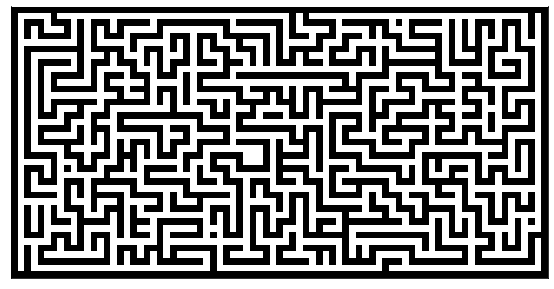

In [15]:
# from http://en.wikipedia.org/wiki/Maze_generation_algorithm
# from http://en.wikipedia.org/wiki/Maze_generation_algorithm
import numpy
from numpy.random import random_integers as rand
import matplotlib.pyplot as pyplot
 
def maze(width=81, height=51, complexity=.75, density=.75):
    # Only odd shapes
    shape = ((height // 2) * 2 + 1, (width // 2) * 2 + 1)
    # Adjust complexity and density relative to maze size
    complexity = int(complexity * (5 * (shape[0] + shape[1])))
    density    = int(density * (shape[0] // 2 * shape[1] // 2))
    # Build actual maze
    Z = numpy.zeros(shape, dtype=bool)
    # Fill borders
    Z[0, :] = Z[-1, :] = 1
    Z[:, 0] = Z[:, -1] = 1
    # Make aisles
    for i in range(density):
        x, y = rand(0, shape[1] // 2) * 2, rand(0, shape[0] // 2) * 2
        Z[y, x] = 1
        for j in range(complexity):
            neighbours = []
            if x > 1:             neighbours.append((y, x - 2))
            if x < shape[1] - 2:  neighbours.append((y, x + 2))
            if y > 1:             neighbours.append((y - 2, x))
            if y < shape[0] - 2:  neighbours.append((y + 2, x))
            if len(neighbours):
                y_,x_ = neighbours[rand(0, len(neighbours) - 1)]
                if Z[y_, x_] == 0:
                    Z[y_, x_] = 1
                    Z[y_ + (y - y_) // 2, x_ + (x - x_) // 2] = 1
                    x, y = x_, y_
    return Z
 
pyplot.figure(figsize=(10, 5))
pyplot.imshow(maze(80, 40), cmap=pyplot.cm.binary, interpolation='nearest')
pyplot.xticks([]), pyplot.yticks([])
pyplot.show()

In [16]:
#!/usr/bin/env python
from PIL import Image, ImageDraw
import random
import os
import glob
import imageio
import shutil


class Cell:
    """Create grid cell."""
    def __init__(self, row_index, column_index, rows, columns):
        """
        Initialize grid cell.
        row_index: cell row index.
        column_index: cell column index.
        rows: number of rows in grid.
        columns: number of columns in grid.
        """
        if row_index >= rows or row_index < 0:
            raise ValueError(f'Expected a row index in range(0, {rows}) exclusive, got {row_index}')
        if column_index >= columns or column_index < 0:
            raise ValueError(f'Expected a column index in range(0, {columns} exclusive, got {column_index}')
        self.row = row_index
        self.column = column_index
        self.rows = rows
        self.columns = columns
        self.linked_cells = []

    def neighbors(self, grid):
        """Return North, South, East, West neighbor cells."""
        neighbors = []
        north = self.row - 1, self.column
        if north[0] < 0:
            north = 0
            neighbors.append(0)
        if north:
            neighbors.append(grid[north[0]][north[1]])
        south = self.row + 1, self.column
        if south[0] >= self.rows:
            south = 0
            neighbors.append(0)
        if south:
            neighbors.append(grid[south[0]][south[1]])
        east = self.row, self.column + 1
        if east[1] >= self.columns:
            east = 0
            neighbors.append(0)
        if east:
            neighbors.append(grid[east[0]][east[1]])
        west = self.row, self.column - 1
        if west[1] < 0:
            west = 0
            neighbors.append(0)
        if west:
            neighbors.append(grid[west[0]][west[1]])
        return neighbors

    def link(self, other, grid):
        """Link 2 unconnected cells."""
        if self in other.linked_cells or other in self.linked_cells:
            raise ValueError(f'{self} and {other} are already connected.')
        if self.columns != other.columns or self.rows != other.rows:
            raise ValueError('Cannot connect cells in different grids.')
        if self not in other.neighbors(grid) or other not in self.neighbors(grid):
            raise ValueError(f'{self} and {other} are not neighbors and cannot be connected.')
        if not isinstance(other, Cell):
            raise TypeError(f'Cannot link Cell to {type(other)}.')
        self.linked_cells.append(other)
        other.linked_cells.append(self)

    def unlink(self, other):
        """Unlink 2 connected cells."""
        if self not in other.linked_cells or other not in self.linked_cells:
            raise ValueError(f'{self} and {other} are not connected.')
        self.linked_cells.remove(other)
        other.linked_cells.remove(self)

    def coordinates(self):
        """Return cell (row, column)."""
        return self.row, self.column

    def __str__(self):
        """Cell display."""
        return f'Cell{self.coordinates()}'


class Maze:
    """
    Generate a maze using different algorithms:
    - Binary Tree algorithm.
    """
    def __init__(self, rows, columns, width, height, line_width=5, line_color='black', background_color='white'):
        """
        Initialize maze variables:
        rows: number of rows in initial grid.
        columns: number of columns in initial grid.
        width: width of the frame(s).
        height: height of the frame(s).
        line_width: width of grid/maze lines.
        line_color: color of grid/maze lines.
        background_color: color of the grid/maze background (cells/path)
        """
        if width % columns != 0:
            raise ValueError(f'Width: {width} not divisible by number of columns: {columns}.')
        if height % rows != 0:
            raise ValueError(f'Height: {height} not divisible by number of {rows}.')
        self.rows = rows
        self.columns = columns
        self.width = width
        self.height = height
        self.line_width = line_width
        self.line_color = line_color
        self.background_color = background_color
        self.cell_width = width // columns
        self.cell_height = height // rows
        self.drawing_constant = line_width // 2
        self.path = input('Enter path to folder to save maze creation GIF: ').rstrip()

    def _make_grid_image(self):
        """Initiate maze initial grid image."""
        grid = Image.new('RGB', (self.width, self.height), self.background_color)
        for x in range(0, self.width, self.cell_width):
            x0, y0, x1, y1 = x, 0, x, self.height
            column = (x0, y0), (x1, y1)
            ImageDraw.Draw(grid).line(column, self.line_color, self.line_width)
        for y in range(0, self.width, self.cell_height):
            x0, y0, x1, y1 = 0, y, self.width, y
            row = (x0, y0), (x1, y1)
            ImageDraw.Draw(grid).line(row, self.line_color, self.line_width)
        x_end = (0, self.height - self.drawing_constant),\
                (self.width - self.drawing_constant, self.height - self.drawing_constant)
        y_end = (self.width - self.drawing_constant, 0), (self.width - self.drawing_constant, self.height)
        ImageDraw.Draw(grid).line(x_end, self.line_color, self.line_width)
        ImageDraw.Draw(grid).line(y_end, self.line_color, self.line_width)
        return grid

    def _create_maze_cells(self):
        """Return maze cells."""
        return [[Cell(row, column, self.rows, self.columns) for column in range(self.columns)]
                for row in range(self.rows)]

    def _binary_tree_configuration(self):
        """Return binary tree maze configuration."""
        cells = self._create_maze_cells()
        for row in range(self.rows):
            for column in range(self.columns):
                current_cell = cells[row][column]
                north, south, east, west = current_cell.neighbors(cells)
                to_link = random.choice('nw')
                if not north and not west:
                    continue
                if to_link == 'n' and north:
                    current_cell.link(north, cells)
                if to_link == 'w' and west:
                    current_cell.link(west, cells)
                if to_link == 'n' and not north:
                    current_cell.link(west, cells)
                if to_link == 'w' and not west:
                    current_cell.link(north, cells)
        return cells

    def make_binary_tree_maze_image(self):
        """Produce a maze image using binary tree algorithm."""
        maze = self._make_grid_image()
        cells = self._binary_tree_configuration()
        linked_cells = {cell.coordinates(): [linked.coordinates() for linked in cell.linked_cells]
                        for row in cells for cell in row}
        for row in range(self.rows):
            for column in range(self.columns):
                current_cell_coordinates = (row, column)
                if (row, column + 1) in linked_cells[current_cell_coordinates]:
                    x0 = (column + 1) * self.cell_width
                    y0 = (row * self.cell_height) + (self.line_width - 2)
                    x1 = x0
                    y1 = y0 + self.cell_height - (self.line_width + 1)
                    wall = (x0, y0), (x1, y1)
                    ImageDraw.Draw(maze).line(wall, self.background_color, self.line_width)
                if (row + 1, column) in linked_cells[current_cell_coordinates]:
                    x0 = column * self.cell_width + self.line_width - 2
                    y0 = (row + 1) * self.cell_height
                    x1 = x0 + self.cell_width - (self.line_width + 1)
                    y1 = y0
                    wall = (x0, y0), (x1, y1)
                    ImageDraw.Draw(maze).line(wall, self.background_color, self.line_width)
        x_end = (0, self.height - self.drawing_constant),\
                (self.width - self.drawing_constant, self.height - self.drawing_constant)
        y_end = (self.width - self.drawing_constant, 0), (self.width - self.drawing_constant, self.height)
        ImageDraw.Draw(maze).line(x_end, self.line_color, self.line_width)
        ImageDraw.Draw(maze).line(y_end, self.line_color, self.line_width)
        return maze

    def make_binary_tree_maze_visualization(self, frame_speed):
        """
        ** NOTE: Works on Unix systems only.
        Create a GIF for maze being created by a binary tree algorithm.
        frame_speed: speed in ms.
        """
        print('GIF creation started ...')
        os.chdir(self.path)
        maze = self._make_grid_image()
        cells = self._binary_tree_configuration()
        linked_cells = {cell.coordinates(): [linked.coordinates() for linked in cell.linked_cells]
                        for row in cells for cell in row}
        count = 0
        for row in range(self.rows):
            for column in range(self.columns):
                current_cell_coordinates = (row, column)
                # Remove vertical walls
                if (row, column + 1) in linked_cells[current_cell_coordinates]:
                    x0 = (column + 1) * self.cell_width
                    y0 = (row * self.cell_height) + (self.line_width - 2)
                    x1 = x0
                    y1 = y0 + self.cell_height - (self.line_width + 1)
                    wall = (x0, y0), (x1, y1)
                    ImageDraw.Draw(maze).line(wall, self.background_color, self.line_width)
                    y_end = (self.width - self.drawing_constant, 0), (self.width - self.drawing_constant, self.height)
                    ImageDraw.Draw(maze).line(y_end, self.line_color, self.line_width)
                    maze.save(self.path + str(count) + '.png', 'png')
                    count += 1
                # Remove horizontal walls
                if (row + 1, column) in linked_cells[current_cell_coordinates]:
                    x0 = column * self.cell_width + self.line_width - 2
                    y0 = (row + 1) * self.cell_height
                    x1 = x0 + self.cell_width - (self.line_width + 1)
                    y1 = y0
                    wall = (x0, y0), (x1, y1)
                    ImageDraw.Draw(maze).line(wall, self.background_color, self.line_width)
                    x_end = (0, self.height - self.drawing_constant), \
                            (self.width - self.drawing_constant, self.height - self.drawing_constant)
                    ImageDraw.Draw(maze).line(x_end, self.line_color, self.line_width)
                    maze.save(self.path + str(count) + '.png', 'png')
                    count += 1
        rand_name = 'maze' + str(random.randint(10 ** 6, 10 ** 8))
        os.mkdir(rand_name)
        for file in os.listdir(self.path):
            if file.endswith('.png'):
                shutil.move(file, rand_name)
        os.chdir(rand_name)
        frames = glob.glob('*.png')
        frames.sort(key=lambda x: int(x.split('.')[0]))
        frames = [imageio.imread(frame) for frame in frames]
        imageio.mimsave(self.path + str(rand_name) + '.gif', frames, 'GIF', duration=frame_speed)
        print(f'Creation of {count} frames GIF successful.')


## if __name__ == '__main__':
maze_test = Maze(50, 50, 500, 500)
maze_test.make_binary_tree_maze_image().show()

Enter path to folder to save maze creation GIF: 
